In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)


#importa base de dados

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df_cols = pd.read_csv('gdrive/My Drive/projeto/INFLUD-25-10-2021.csv',sep=",",nrows=0)

#importar colunas necessarias

In [4]:
df_cols.head()

,"DT_NOTIFIC;""SEM_NOT"";""DT_SIN_PRI"";""SEM_PRI"";""SG_UF_NOT"";""ID_REGIONA"";""CO_REGIONA"";""ID_MUNICIP"";""CO_MUN_NOT"";""ID_UNIDADE"";""CO_UNI_NOT"";""CS_SEXO"";""DT_NASC"";""NU_IDADE_N"";""TP_IDADE"";""COD_IDADE"";""CS_GESTANT"";""CS_RACA"";""CS_ETINIA"";""CS_ESCOL_N"";""ID_PAIS"";""CO_PAIS"";""SG_UF"";""ID_RG_RESI"";""CO_RG_RESI"";""ID_MN_RESI"";""CO_MUN_RES"";""CS_ZONA"";""SURTO_SG"";""NOSOCOMIAL"";""AVE_SUINO"";""FEBRE"";""TOSSE"";""GARGANTA"";""DISPNEIA"";""DESC_RESP"";""SATURACAO"";""DIARREIA"";""VOMITO"";""OUTRO_SIN"";""OUTRO_DES"";""PUERPERA"";""FATOR_RISC"";""CARDIOPATI"";""HEMATOLOGI"";""SIND_DOWN"";""HEPATICA"";""ASMA"";""DIABETES"";""NEUROLOGIC"";""PNEUMOPATI"";""IMUNODEPRE"";""RENAL"";""OBESIDADE"";""OBES_IMC"";""OUT_MORBI"";""MORB_DESC"";""VACINA"";""DT_UT_DOSE"";""MAE_VAC"";""DT_VAC_MAE"";""M_AMAMENTA"";""DT_DOSEUNI"";""DT_1_DOSE"";""DT_2_DOSE"";""ANTIVIRAL"";""TP_ANTIVIR"";""OUT_ANTIV"";""DT_ANTIVIR"";""HOSPITAL"";""DT_INTERNA"";""SG_UF_INTE"";""ID_RG_INTE"";""CO_RG_INTE"";""ID_MN_INTE"";""CO_MU_INTE"";""UTI"";""DT_ENTUTI"";""DT_SAIDUTI"";""SUPORT_VEN"";""RAIOX_RES"";""RAIOX_OUT"";""DT_RAIOX"";""AMOSTRA"";""DT_COLETA"";""TP_AMOSTRA"";""OUT_AMOST"";""PCR_RESUL"";""DT_PCR"";""POS_PCRFLU"";""TP_FLU_PCR"";""PCR_FLUASU"";""FLUASU_OUT"";""PCR_FLUBLI"";""FLUBLI_OUT"";""POS_PCROUT"";""PCR_VSR"";""PCR_PARA1"";""PCR_PARA2"";""PCR_PARA3"";""PCR_PARA4"";""PCR_ADENO"";""PCR_METAP"";""PCR_BOCA"";""PCR_RINO"";""PCR_OUTRO"";""DS_PCR_OUT"";""CLASSI_FIN"";""CLASSI_OUT"";""CRITERIO"";""EVOLUCAO"";""DT_EVOLUCA"";""DT_ENCERRA"";""DT_DIGITA"";""HISTO_VGM"";""PAIS_VGM"";""CO_PS_VGM"";""LO_PS_VGM"";""DT_VGM"";""DT_RT_VGM"";""PCR_SARS2"";""PAC_COCBO"";""PAC_DSCBO"";""OUT_ANIM"";""DOR_ABD"";""FADIGA"";""PERD_OLFT"";""PERD_PALA"";""TOMO_RES"";""TOMO_OUT"";""DT_TOMO"";""TP_TES_AN"";""DT_RES_AN"";""RES_AN"";""POS_AN_FLU"";""TP_FLU_AN"";""POS_AN_OUT"";""AN_SARS2"";""AN_VSR"";""AN_PARA1"";""AN_PARA2"";""AN_PARA3"";""AN_ADENO"";""AN_OUTRO"";""DS_AN_OUT"";""TP_AM_SOR"";""SOR_OUT"";""DT_CO_SOR"";""TP_SOR"";""OUT_SOR"";""DT_RES"";""RES_IGG"";""RES_IGM"";""RES_IGA"""


In [5]:
cols = ['FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO','DIARREIA','VOMITO','DOR_ABD','FADIGA','PERD_OLFT','PERD_PALA','RAIOX_RES','HOSPITAL','HISTO_VGM','TOMO_RES','CLASSI_FIN']

In [6]:
df = pd.read_csv('gdrive/My Drive/projeto/INFLUD-25-10-2021.csv',sep=";",usecols = cols)

#Tratamento de dados

Ordenar colunas

In [7]:
df = df.reindex(columns=cols)

In [8]:
df = pd.concat((df.select_dtypes(include=['object']),df.select_dtypes(exclude=['object'])),axis=1)

In [9]:
df.drop_duplicates()
df.describe().T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199291 entries, 0 to 1199290
Data columns (total 17 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   FEBRE       1041291 non-null  float64
 1   TOSSE       1066111 non-null  float64
 2   GARGANTA    902813 non-null   float64
 3   DISPNEIA    1065159 non-null  float64
 4   DESC_RESP   1002637 non-null  float64
 5   SATURACAO   1009137 non-null  float64
 6   DIARREIA    889994 non-null   float64
 7   VOMITO      878670 non-null   float64
 8   DOR_ABD     532905 non-null   float64
 9   FADIGA      548253 non-null   float64
 10  PERD_OLFT   538743 non-null   float64
 11  PERD_PALA   537564 non-null   float64
 12  RAIOX_RES   792055 non-null   float64
 13  HOSPITAL    1169632 non-null  float64
 14  HISTO_VGM   1199291 non-null  int64  
 15  TOMO_RES    445961 non-null   float64
 16  CLASSI_FIN  1146326 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 155.5 MB


In [10]:
# ESTATÍSTICA DESCRITIVA DAS VARIÁVEIS
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FEBRE,1041291.0,1.467658,1.104120,1.0,1.0,1.0,2.0,9.0
TOSSE,1066111.0,1.351381,1.020055,1.0,1.0,1.0,1.0,9.0
GARGANTA,902813.0,2.022904,1.390506,1.0,2.0,2.0,2.0,9.0
DISPNEIA,1065159.0,1.329868,0.972492,1.0,1.0,1.0,1.0,9.0
DESC_RESP,1002637.0,1.455576,1.105006,1.0,1.0,1.0,2.0,9.0
SATURACAO,1009137.0,1.507007,1.220314,1.0,1.0,1.0,2.0,9.0
DIARREIA,889994.0,2.068805,1.343079,1.0,2.0,2.0,2.0,9.0
VOMITO,878670.0,2.126693,1.353496,1.0,2.0,2.0,2.0,9.0
DOR_ABD,532905.0,2.237759,1.496008,1.0,2.0,2.0,2.0,9.0
FADIGA,548253.0,2.051177,1.529580,1.0,2.0,2.0,2.0,9.0


In [11]:
df.loc[df.CLASSI_FIN	==3,'CLASSI_FIN']=2
df.loc[df.CLASSI_FIN	==4,'CLASSI_FIN']=2
df.loc[df.CLASSI_FIN	==5,'CLASSI_FIN']=3 

df.describe().T
# atribui o valor 2 para as duas outras colunas e identifico como outros

,count,mean,std,min,25%,50%,75%,max
FEBRE,1041291.0,1.467658,1.104120,1.0,1.0,1.0,2.0,9.0
TOSSE,1066111.0,1.351381,1.020055,1.0,1.0,1.0,1.0,9.0
GARGANTA,902813.0,2.022904,1.390506,1.0,2.0,2.0,2.0,9.0
DISPNEIA,1065159.0,1.329868,0.972492,1.0,1.0,1.0,1.0,9.0
DESC_RESP,1002637.0,1.455576,1.105006,1.0,1.0,1.0,2.0,9.0
SATURACAO,1009137.0,1.507007,1.220314,1.0,1.0,1.0,2.0,9.0
DIARREIA,889994.0,2.068805,1.343079,1.0,2.0,2.0,2.0,9.0
VOMITO,878670.0,2.126693,1.353496,1.0,2.0,2.0,2.0,9.0
DOR_ABD,532905.0,2.237759,1.496008,1.0,2.0,2.0,2.0,9.0
FADIGA,548253.0,2.051177,1.529580,1.0,2.0,2.0,2.0,9.0


#Dados nulos

In [12]:
df.isnull().sum()

FEBRE         158000
TOSSE         133180
GARGANTA      296478
DISPNEIA      134132
DESC_RESP     196654
SATURACAO     190154
DIARREIA      309297
VOMITO        320621
DOR_ABD       666386
FADIGA        651038
PERD_OLFT     660548
PERD_PALA     661727
RAIOX_RES     407236
HOSPITAL       29659
HISTO_VGM          0
TOMO_RES      753330
CLASSI_FIN     52965
dtype: int64

In [13]:
values = {'FEBRE':9,'TOSSE':9,'GARGANTA':9,'DISPNEIA':9,'DESC_RESP':9,'SATURACAO':9,'DIARREIA':9,'VOMITO':9,'DOR_ABD':9,'FADIGA':9,'PERD_OLFT':9,'PERD_PALA':9,'RAIOX_RES':9,'HOSPITAL':9,'HISTO_VGM':9,'TOMO_RES':9,'CLASSI_FIN':2}
df.update(df.fillna(value=values))

In [14]:
df.isnull().sum()

FEBRE         0
TOSSE         0
GARGANTA      0
DISPNEIA      0
DESC_RESP     0
SATURACAO     0
DIARREIA      0
VOMITO        0
DOR_ABD       0
FADIGA        0
PERD_OLFT     0
PERD_PALA     0
RAIOX_RES     0
HOSPITAL      0
HISTO_VGM     0
TOMO_RES      0
CLASSI_FIN    0
dtype: int64

In [15]:
df = df.astype(int)

In [16]:
df.head()

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,RAIOX_RES,HOSPITAL,HISTO_VGM,TOMO_RES,CLASSI_FIN
0,1,1,9,1,1,9,9,9,9,9,9,9,9,1,0,9,2
1,1,1,9,1,1,9,1,1,9,9,9,9,3,1,0,9,2
2,1,1,2,1,1,2,2,2,9,9,9,9,2,1,2,9,2
3,1,1,2,1,1,1,2,2,9,9,9,9,2,1,2,9,2
4,1,1,2,2,1,1,2,1,9,9,9,9,6,1,2,9,2


#Determinar o tamanho da amostra

In [ ]:
import math
def tamanhoAmostra(e,N,z,p):

   n = (N*p*(1-p)*(z**2))/(p*(1-p)*(z**2)+(N-1)*(e**2))
   
   return (n)

e = 0.05
N = len(df) 
z = 1.96
p = 0.5

size = math.ceil(tamanhoAmostra(e,N,z,p))


#Analise amostra

In [ ]:


amostra = df.sample(n=size)


amostra.loc[amostra.CLASSI_FIN	==1,'CLASSI_FIN']='INFLUENZA'
amostra.loc[amostra.CLASSI_FIN	==2,'CLASSI_FIN']='OUTRO'
amostra.loc[amostra.CLASSI_FIN	==3,'CLASSI_FIN']='COVID'


classf = amostra.groupby(amostra.CLASSI_FIN)
inf_df = classf.get_group("INFLUENZA")
out_df = classf.get_group("OUTRO")
cov_df = classf.get_group("COVID")



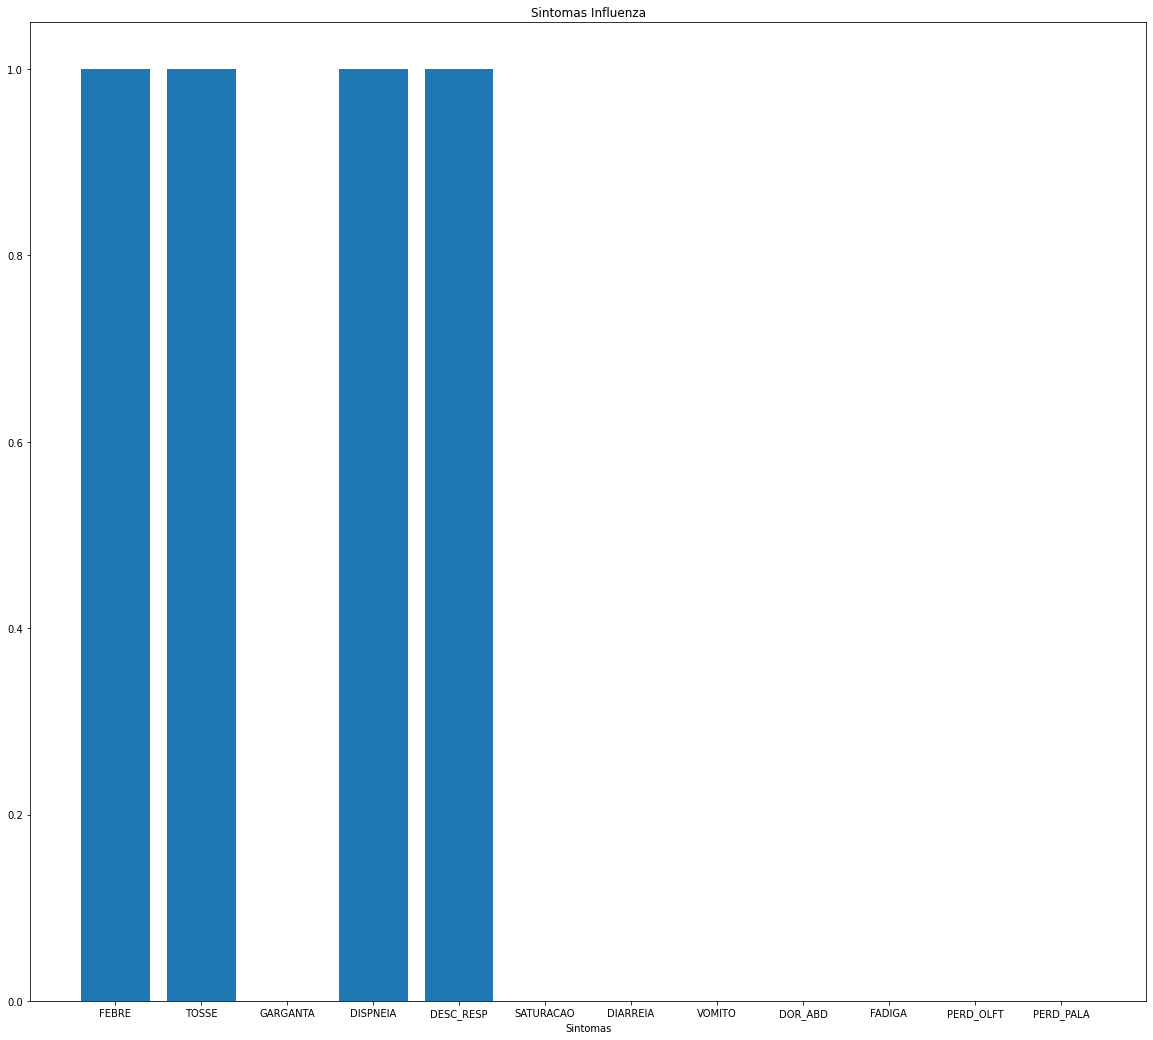

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
#Influenza Sintomas

sintomas = ['FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO','DIARREIA','VOMITO','DOR_ABD','FADIGA','PERD_OLFT','PERD_PALA']

inf_df2=pd.DataFrame(inf_df, columns = sintomas)
filtered_df = inf_df2[inf_df2.eq(1)]

x = sintomas
y = filtered_df.sum()
plt.figure( figsize=(20, 18))
plt.xlabel('Sintomas')
plt.title('Sintomas Influenza')
plt.bar(x,y)
plt.show()


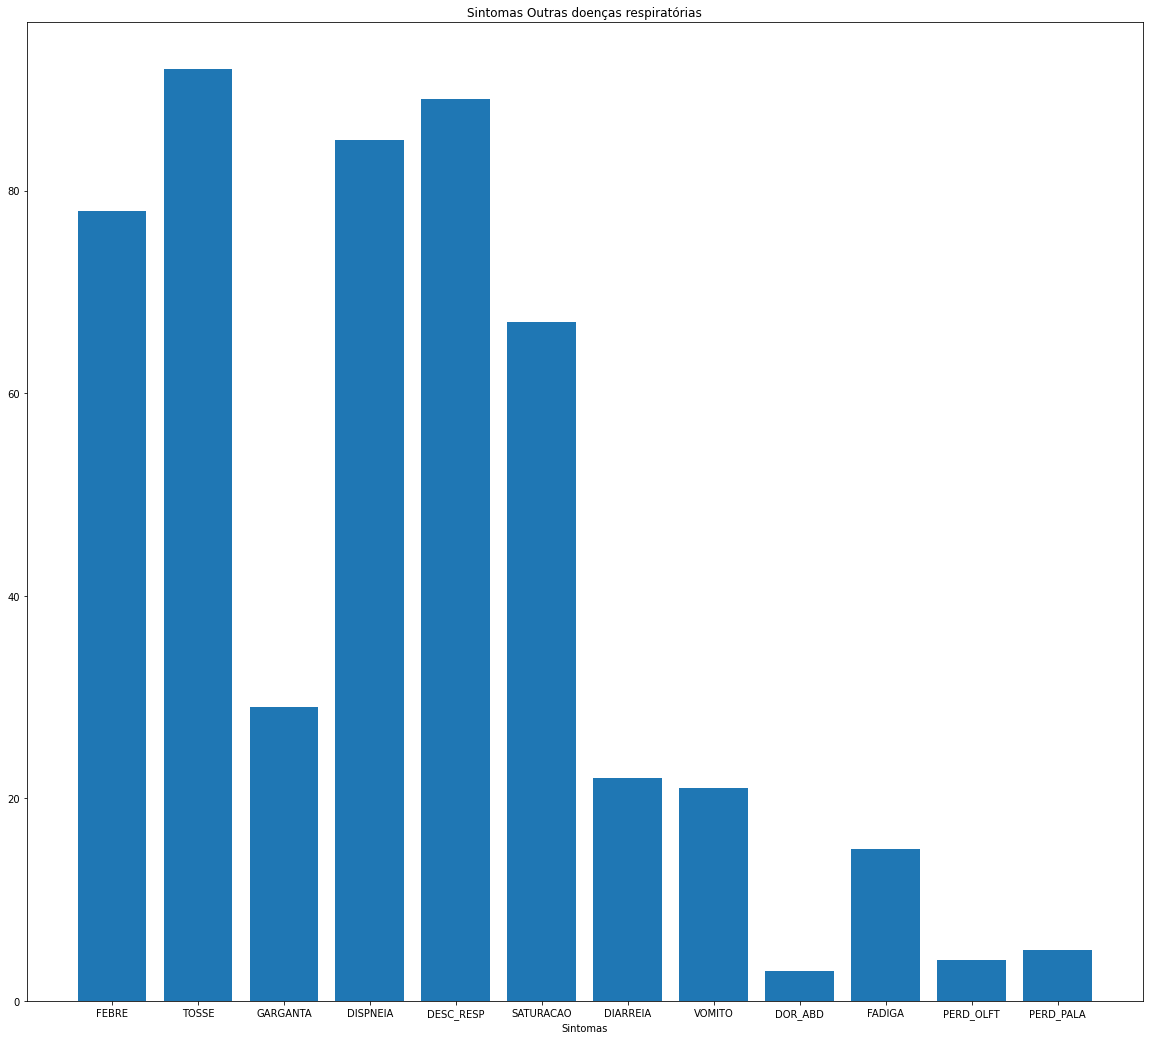

         FEBRE  TOSSE  GARGANTA  DISPNEIA  DESC_RESP  SATURACAO  DIARREIA  \
147667     1.0    1.0       1.0       1.0        1.0        NaN       NaN   
308916     NaN    NaN       NaN       1.0        1.0        1.0       NaN   
93172      1.0    NaN       NaN       NaN        NaN        NaN       NaN   
723634     1.0    1.0       1.0       NaN        NaN        NaN       NaN   
860270     1.0    1.0       NaN       NaN        1.0        NaN       NaN   
...        ...    ...       ...       ...        ...        ...       ...   
1159136    1.0    NaN       NaN       NaN        NaN        NaN       1.0   
84256      NaN    1.0       NaN       1.0        1.0        1.0       NaN   
623357     NaN    1.0       NaN       1.0        NaN        NaN       NaN   
747773     NaN    NaN       NaN       1.0        1.0        1.0       NaN   
1146987    NaN    1.0       NaN       NaN        NaN        1.0       NaN   

         VOMITO  DOR_ABD  FADIGA  PERD_OLFT  PERD_PALA  
147667      1.0   

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
#Outras doenças Sintomas

sintomas = ['FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO','DIARREIA','VOMITO','DOR_ABD','FADIGA','PERD_OLFT','PERD_PALA']

inf_df2=pd.DataFrame(out_df, columns = sintomas)
filtered_df = inf_df2[inf_df2.eq(1)]

x = sintomas
y = filtered_df.sum()
plt.figure( figsize=(20, 18))
plt.xlabel('Sintomas')
plt.title('Sintomas Outras doenças respiratórias')
plt.bar(x,y)
plt.show()
print (filtered_df)

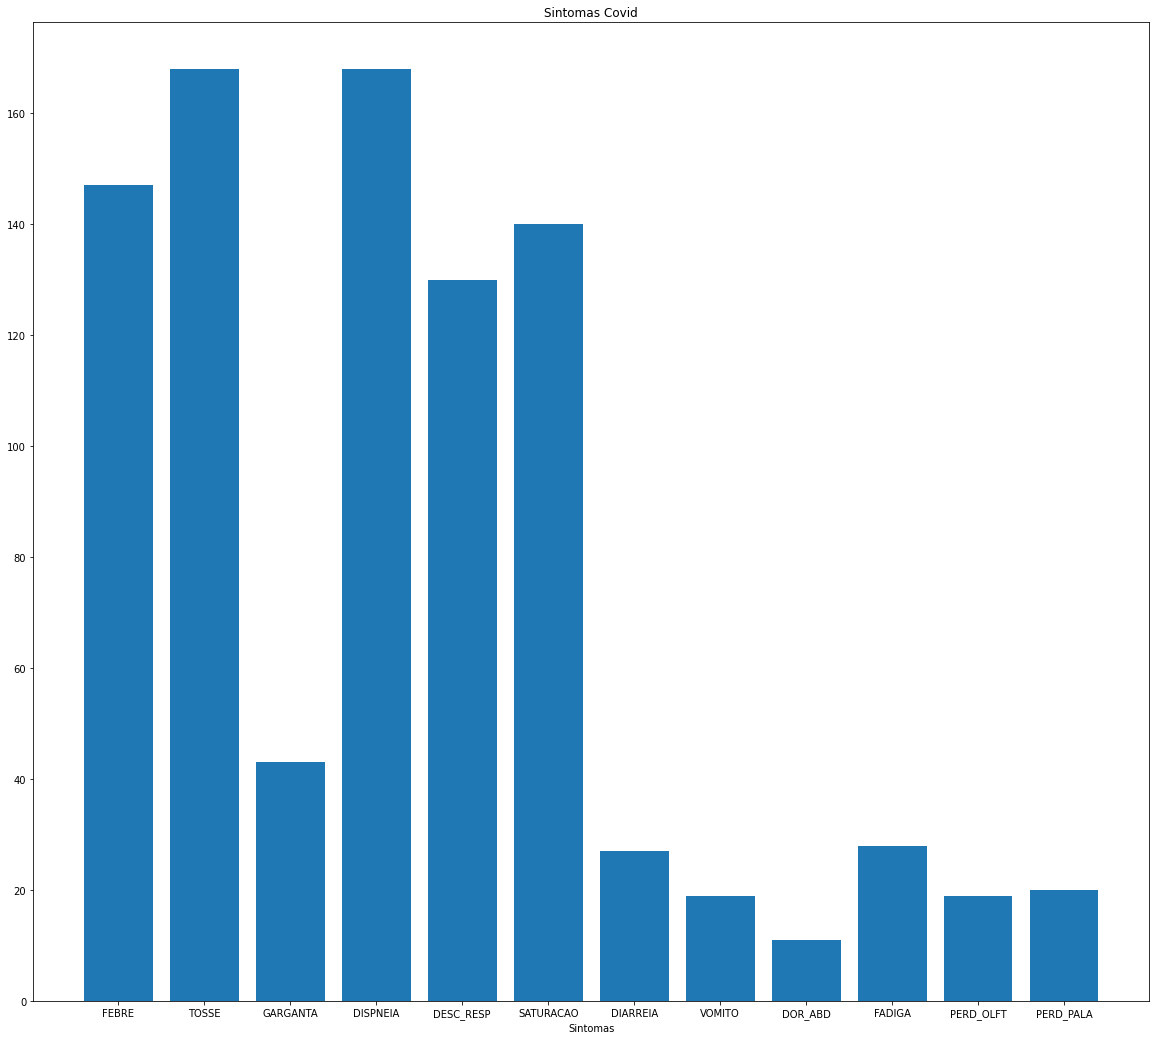

         FEBRE  TOSSE  GARGANTA  DISPNEIA  DESC_RESP  SATURACAO  DIARREIA  \
563041     1.0    1.0       NaN       1.0        1.0        1.0       NaN   
951152     NaN    NaN       NaN       1.0        1.0        1.0       NaN   
309881     NaN    NaN       NaN       1.0        NaN        1.0       NaN   
1039098    1.0    NaN       NaN       NaN        NaN        1.0       NaN   
629159     1.0    1.0       NaN       NaN        1.0        1.0       NaN   
...        ...    ...       ...       ...        ...        ...       ...   
40173      NaN    NaN       NaN       1.0        1.0        1.0       NaN   
109905     NaN    NaN       NaN       1.0        1.0        1.0       NaN   
585708     1.0    1.0       NaN       NaN        1.0        NaN       NaN   
87435      NaN    1.0       NaN       1.0        NaN        NaN       NaN   
833525     NaN    1.0       NaN       NaN        NaN        NaN       NaN   

         VOMITO  DOR_ABD  FADIGA  PERD_OLFT  PERD_PALA  
563041      NaN   

In [ ]:
from matplotlib import pyplot as plt

#Influenza Sintomas

sintomas = ['FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO','DIARREIA','VOMITO','DOR_ABD','FADIGA','PERD_OLFT','PERD_PALA']

inf_df2=pd.DataFrame(cov_df, columns = sintomas)
filtered_df = inf_df2[inf_df2.eq(1)]

x = sintomas
y = filtered_df.sum()
plt.figure( figsize=(20, 18))
plt.xlabel('Sintomas')
plt.title('Sintomas Covid')
plt.bar(x,y)
plt.show()
print (filtered_df)

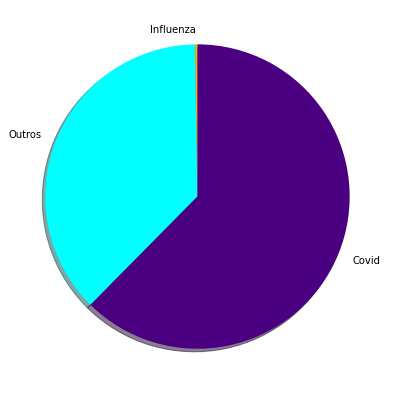

In [ ]:
#Internações


x1 = inf_df[inf_df.HOSPITAL.eq(1)].sum()
x2 = out_df[out_df.HOSPITAL.eq(1)].sum()
x3 = cov_df[cov_df.HOSPITAL.eq(1)].sum()

label =('Influenza','Outros','Covid')
data = [x1.HOSPITAL,x2.HOSPITAL,x3.HOSPITAL]
colors = ( "orange", "cyan", "indigo") 

fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = label, shadow = True, colors = colors,  startangle = 90) 
plt.show() 


In [ ]:
print(len(inf_df))
print(len(out_df))
print(len(cov_df))


1
144
240


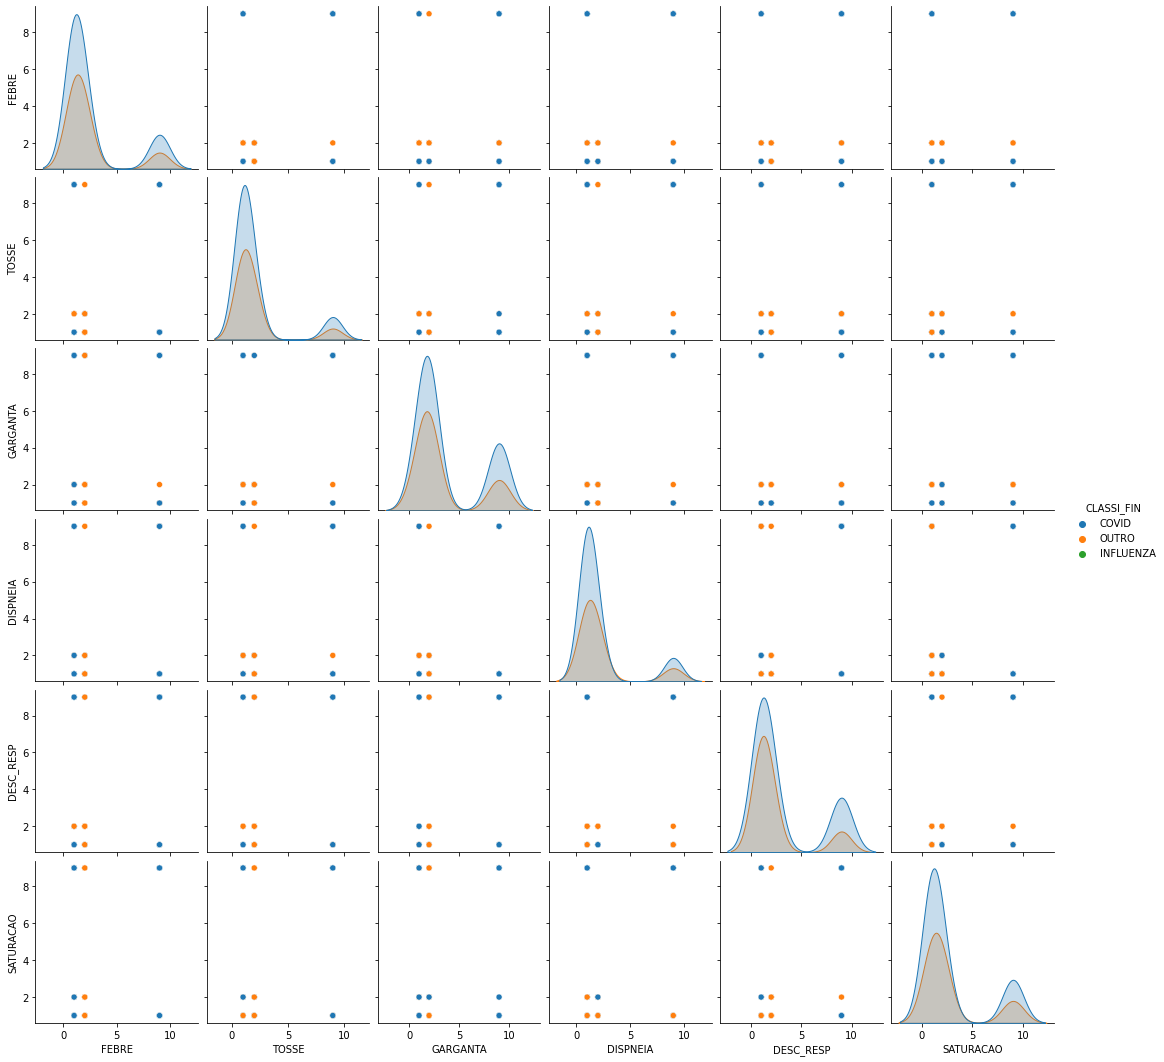

In [ ]:
import seaborn as sns


sns.pairplot(amostra,vars=['FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO'], hue='CLASSI_FIN')



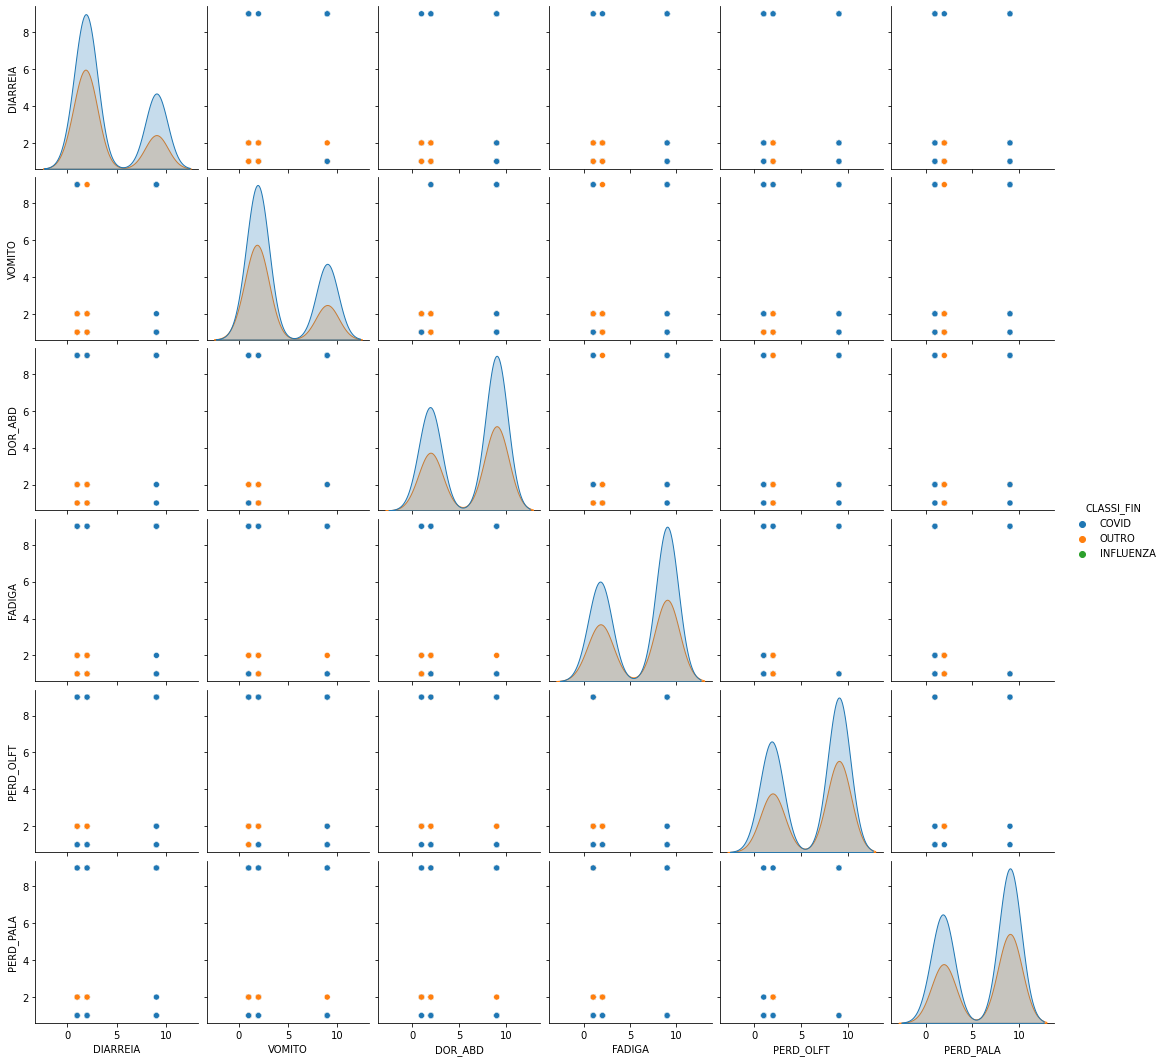

In [ ]:
sns.pairplot(amostra,vars=['DIARREIA','VOMITO','DOR_ABD','FADIGA','PERD_OLFT','PERD_PALA'], hue='CLASSI_FIN')

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
X = df.drop('CLASSI_FIN',axis=1)
y = df['CLASSI_FIN']
 
metricas = ['accuracy', 'precision_macro', 'recall_macro','f1_macro']
cv = ShuffleSplit(n_splits=5, random_state=45)

#NAIVE BAYES

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [20]:
scores = cross_validate(gnb, X, y, cv=5, scoring=metricas)
for met in scores:
    print(f"- {met}:")
    print(f"-- {scores[met]}")
    print(f"-- {np.mean(scores[met])} +- {np.std(scores[met])}\n")  




- fit_time:
-- [0.50765896 0.43336368 0.43429232 0.43209147 0.42228866]
-- 0.4459390163421631 +- 0.031158401759182247

- score_time:
-- [0.41129041 0.39233088 0.40192151 0.38276577 0.38554001]
-- 0.39476971626281737 +- 0.010576497735216933

- test_accuracy:
-- [0.47280694 0.47412636 0.46914841 0.47823712 0.4802258 ]
-- 0.4749089271094224 +- 0.003938535722013798

- test_precision_macro:
-- [0.37292486 0.37067028 0.37188628 0.37510721 0.37463721]
-- 0.3730451681243141 +- 0.0016603752743642407

- test_recall_macro:
-- [0.47758861 0.4730657  0.45987835 0.48918349 0.47667439]
-- 0.4752781083493366 +- 0.009409515389239518

- test_f1_macro:
-- [0.32210552 0.31963191 0.31816961 0.32511373 0.32403509]
-- 0.3218111713761949 +- 0.0026057442176094544



#Árvore de decisão

In [21]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()

In [22]:
scores = cross_validate(tree, X, y, cv=5, scoring=metricas)
for met in scores:
    print(f"- {met}:")
    print(f"-- {scores[met]}")
    print(f"-- {np.mean(scores[met])} +- {np.std(scores[met])}\n")  


- fit_time:
-- [5.2497375  5.26732612 5.31273985 5.2073555  5.21596217]
-- 5.2506242275238035 +- 0.03797823269364871

- score_time:
-- [0.42542243 0.4237082  0.43075681 0.42199564 0.42924309]
-- 0.4262252330780029 +- 0.003301878778683042

- test_accuracy:
-- [0.62698919 0.62753379 0.62764636 0.62732533 0.627317  ]
-- 0.627362333556363 +- 0.00022482353744093697

- test_precision_macro:
-- [0.44484071 0.42000006 0.41865283 0.45453307 0.41528725]
-- 0.4306627837547943 +- 0.015906877897007222

- test_recall_macro:
-- [0.40660555 0.40445004 0.40389156 0.40806464 0.40270105]
-- 0.40514256926470865 +- 0.0019331029623075589

- test_f1_macro:
-- [0.41106244 0.40641037 0.40549025 0.41327877 0.40379711]
-- 0.4080077902286571 +- 0.0035702566506225965

